# **Importing necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')

print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


# **Basic information about the dataset**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# **Checking for Null Value**s


In [4]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# **Summary Statistics**

In [5]:
print(df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

# **Target Value Percentage Distribution**

In [6]:
# Count the number of subscriptions to term deposits (target variable 'y')
print(df['y'].value_counts(normalize=True) * 100)  # Percentage of yes/no

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


# **Separate numerical and categorical features**

In [7]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# **EDA on Numerical Features**

# **Histograms**

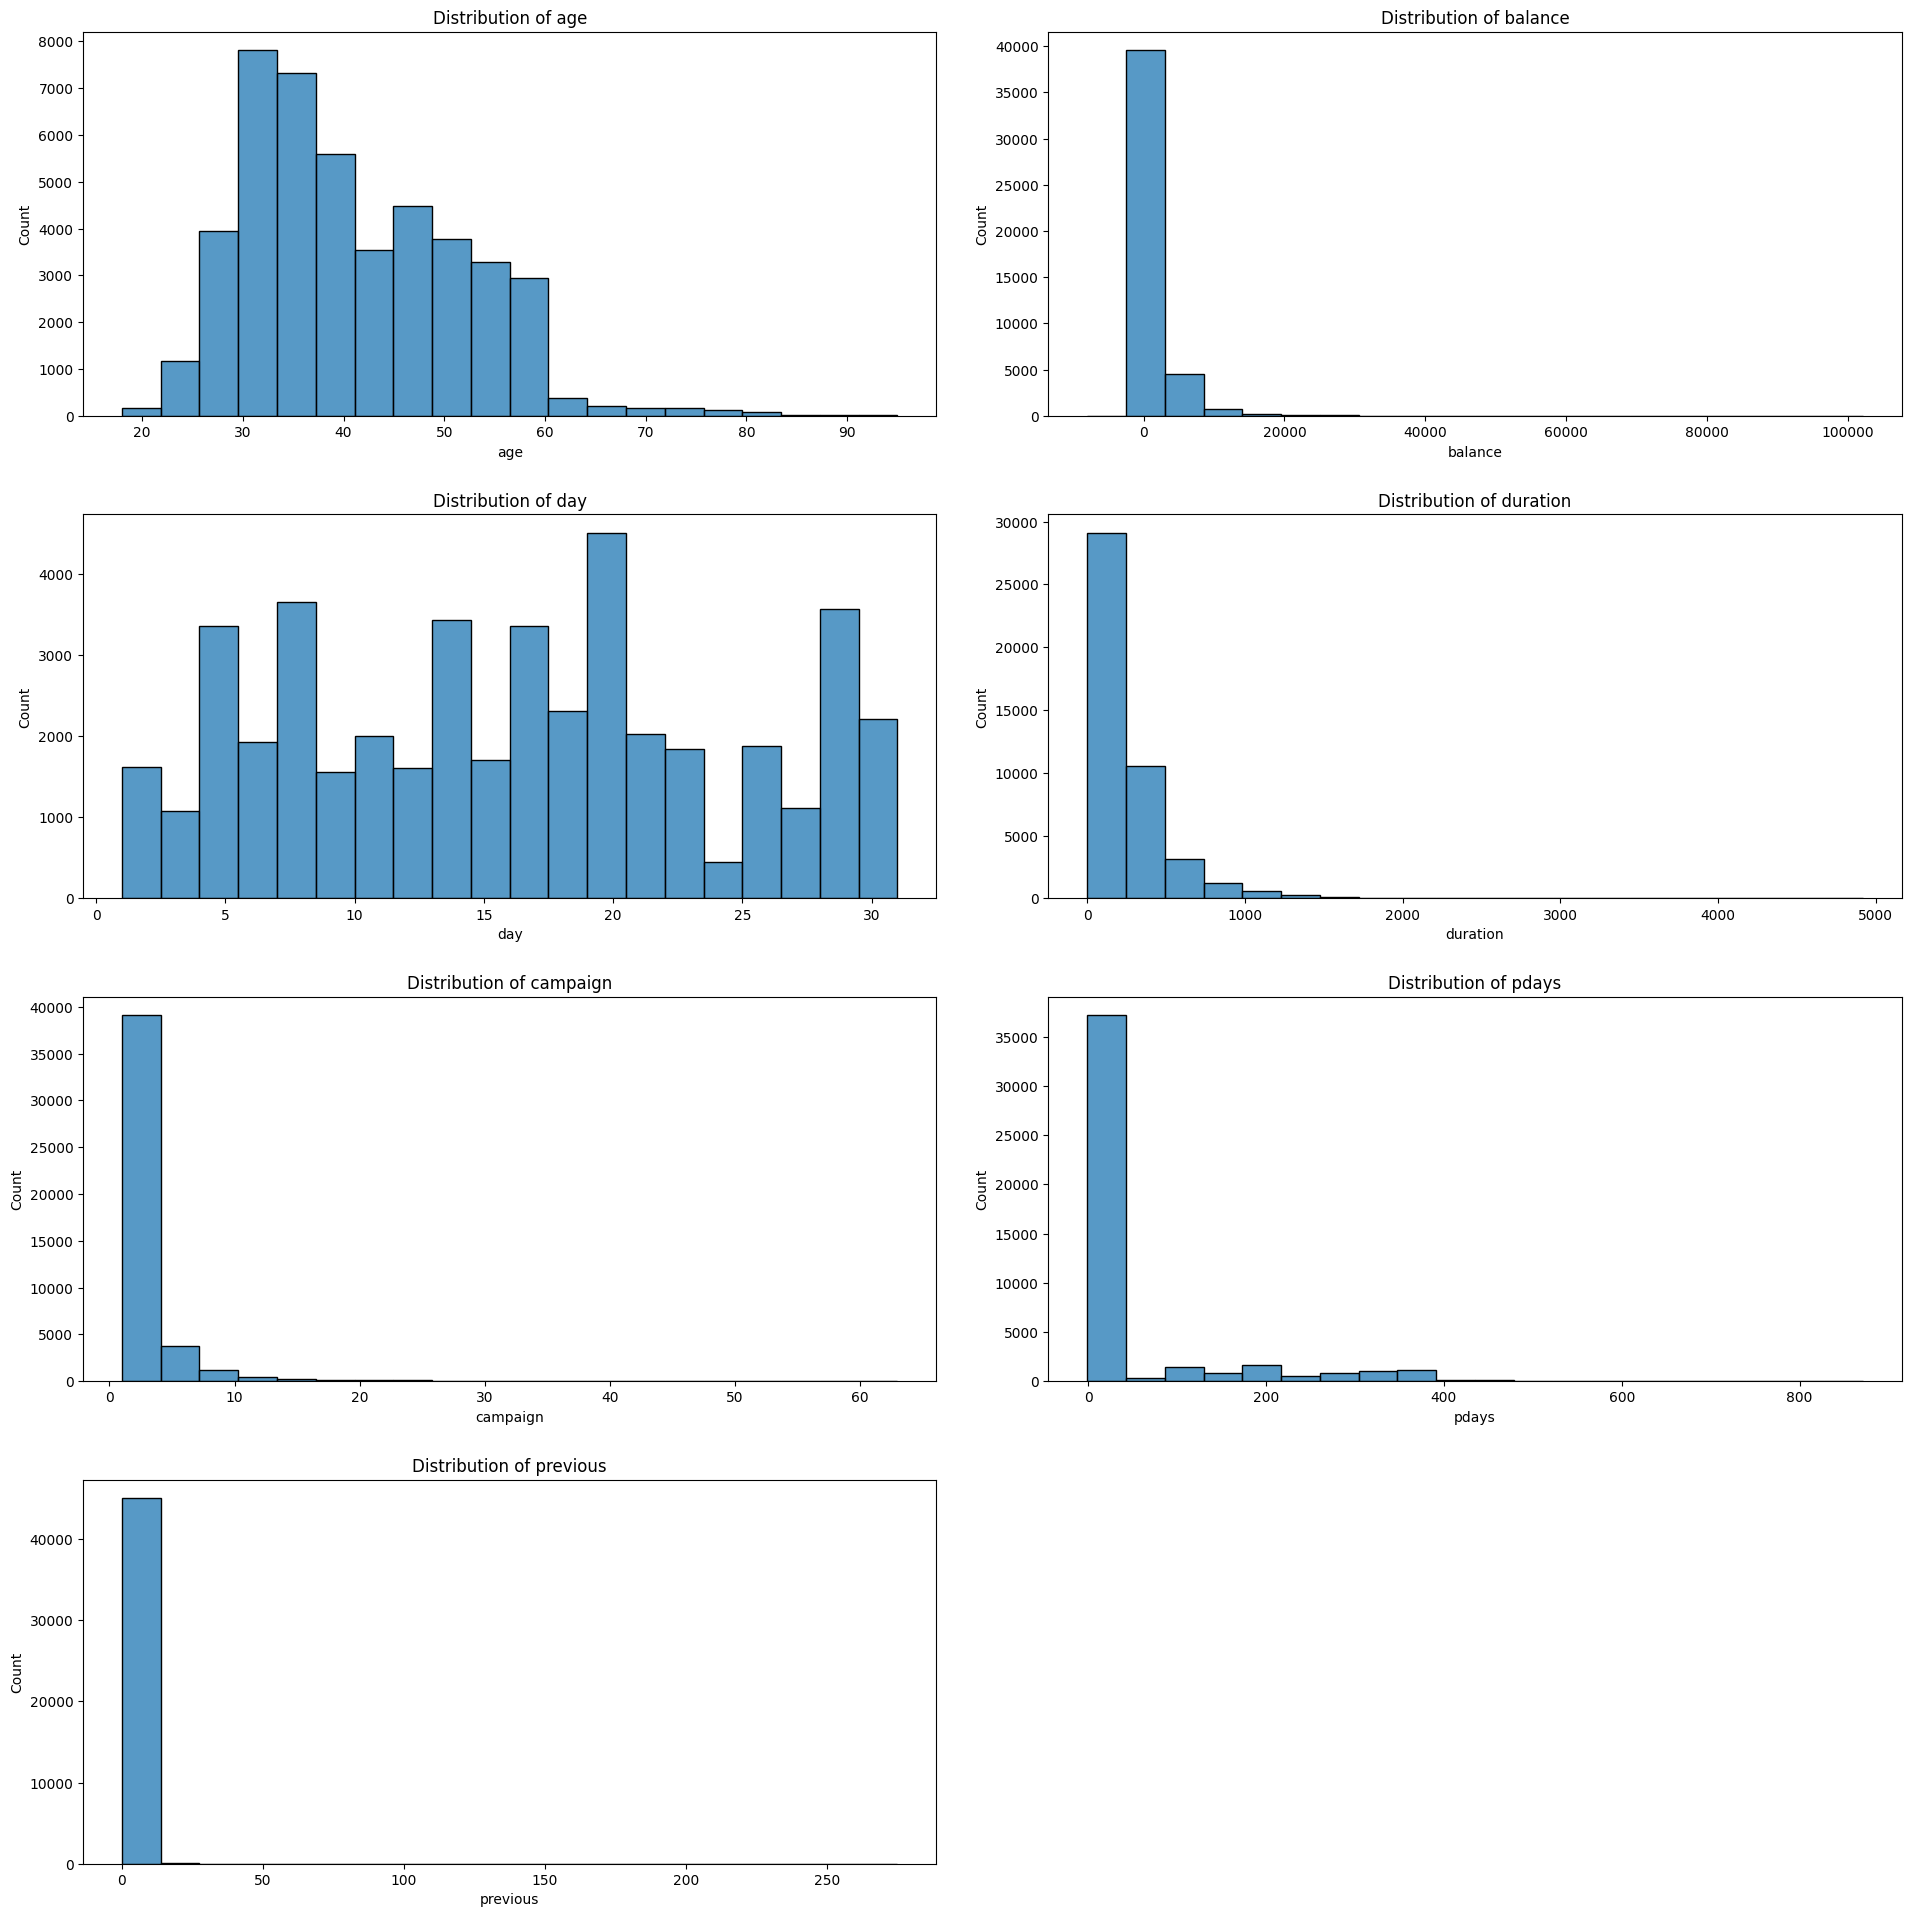

In [8]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Grid for subplots
n_cols = 2  # Number of columns in the grid
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Calculate the required number of rows

# Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.tight_layout(pad=5.0)  # Add space between plots

# Loop through the numerical features and create a histogram for each
for i, feature in enumerate(numerical_features):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.histplot(df[feature], bins=20, ax=ax)
    ax.set_title(f'Distribution of {feature}')

# If the number of features is odd, remove the last ax
if len(numerical_features) % n_cols != 0:
    fig.delaxes(axes[-1, -1])  # Remove the empty subplot if necessary

plt.show()

# **Box Plots**

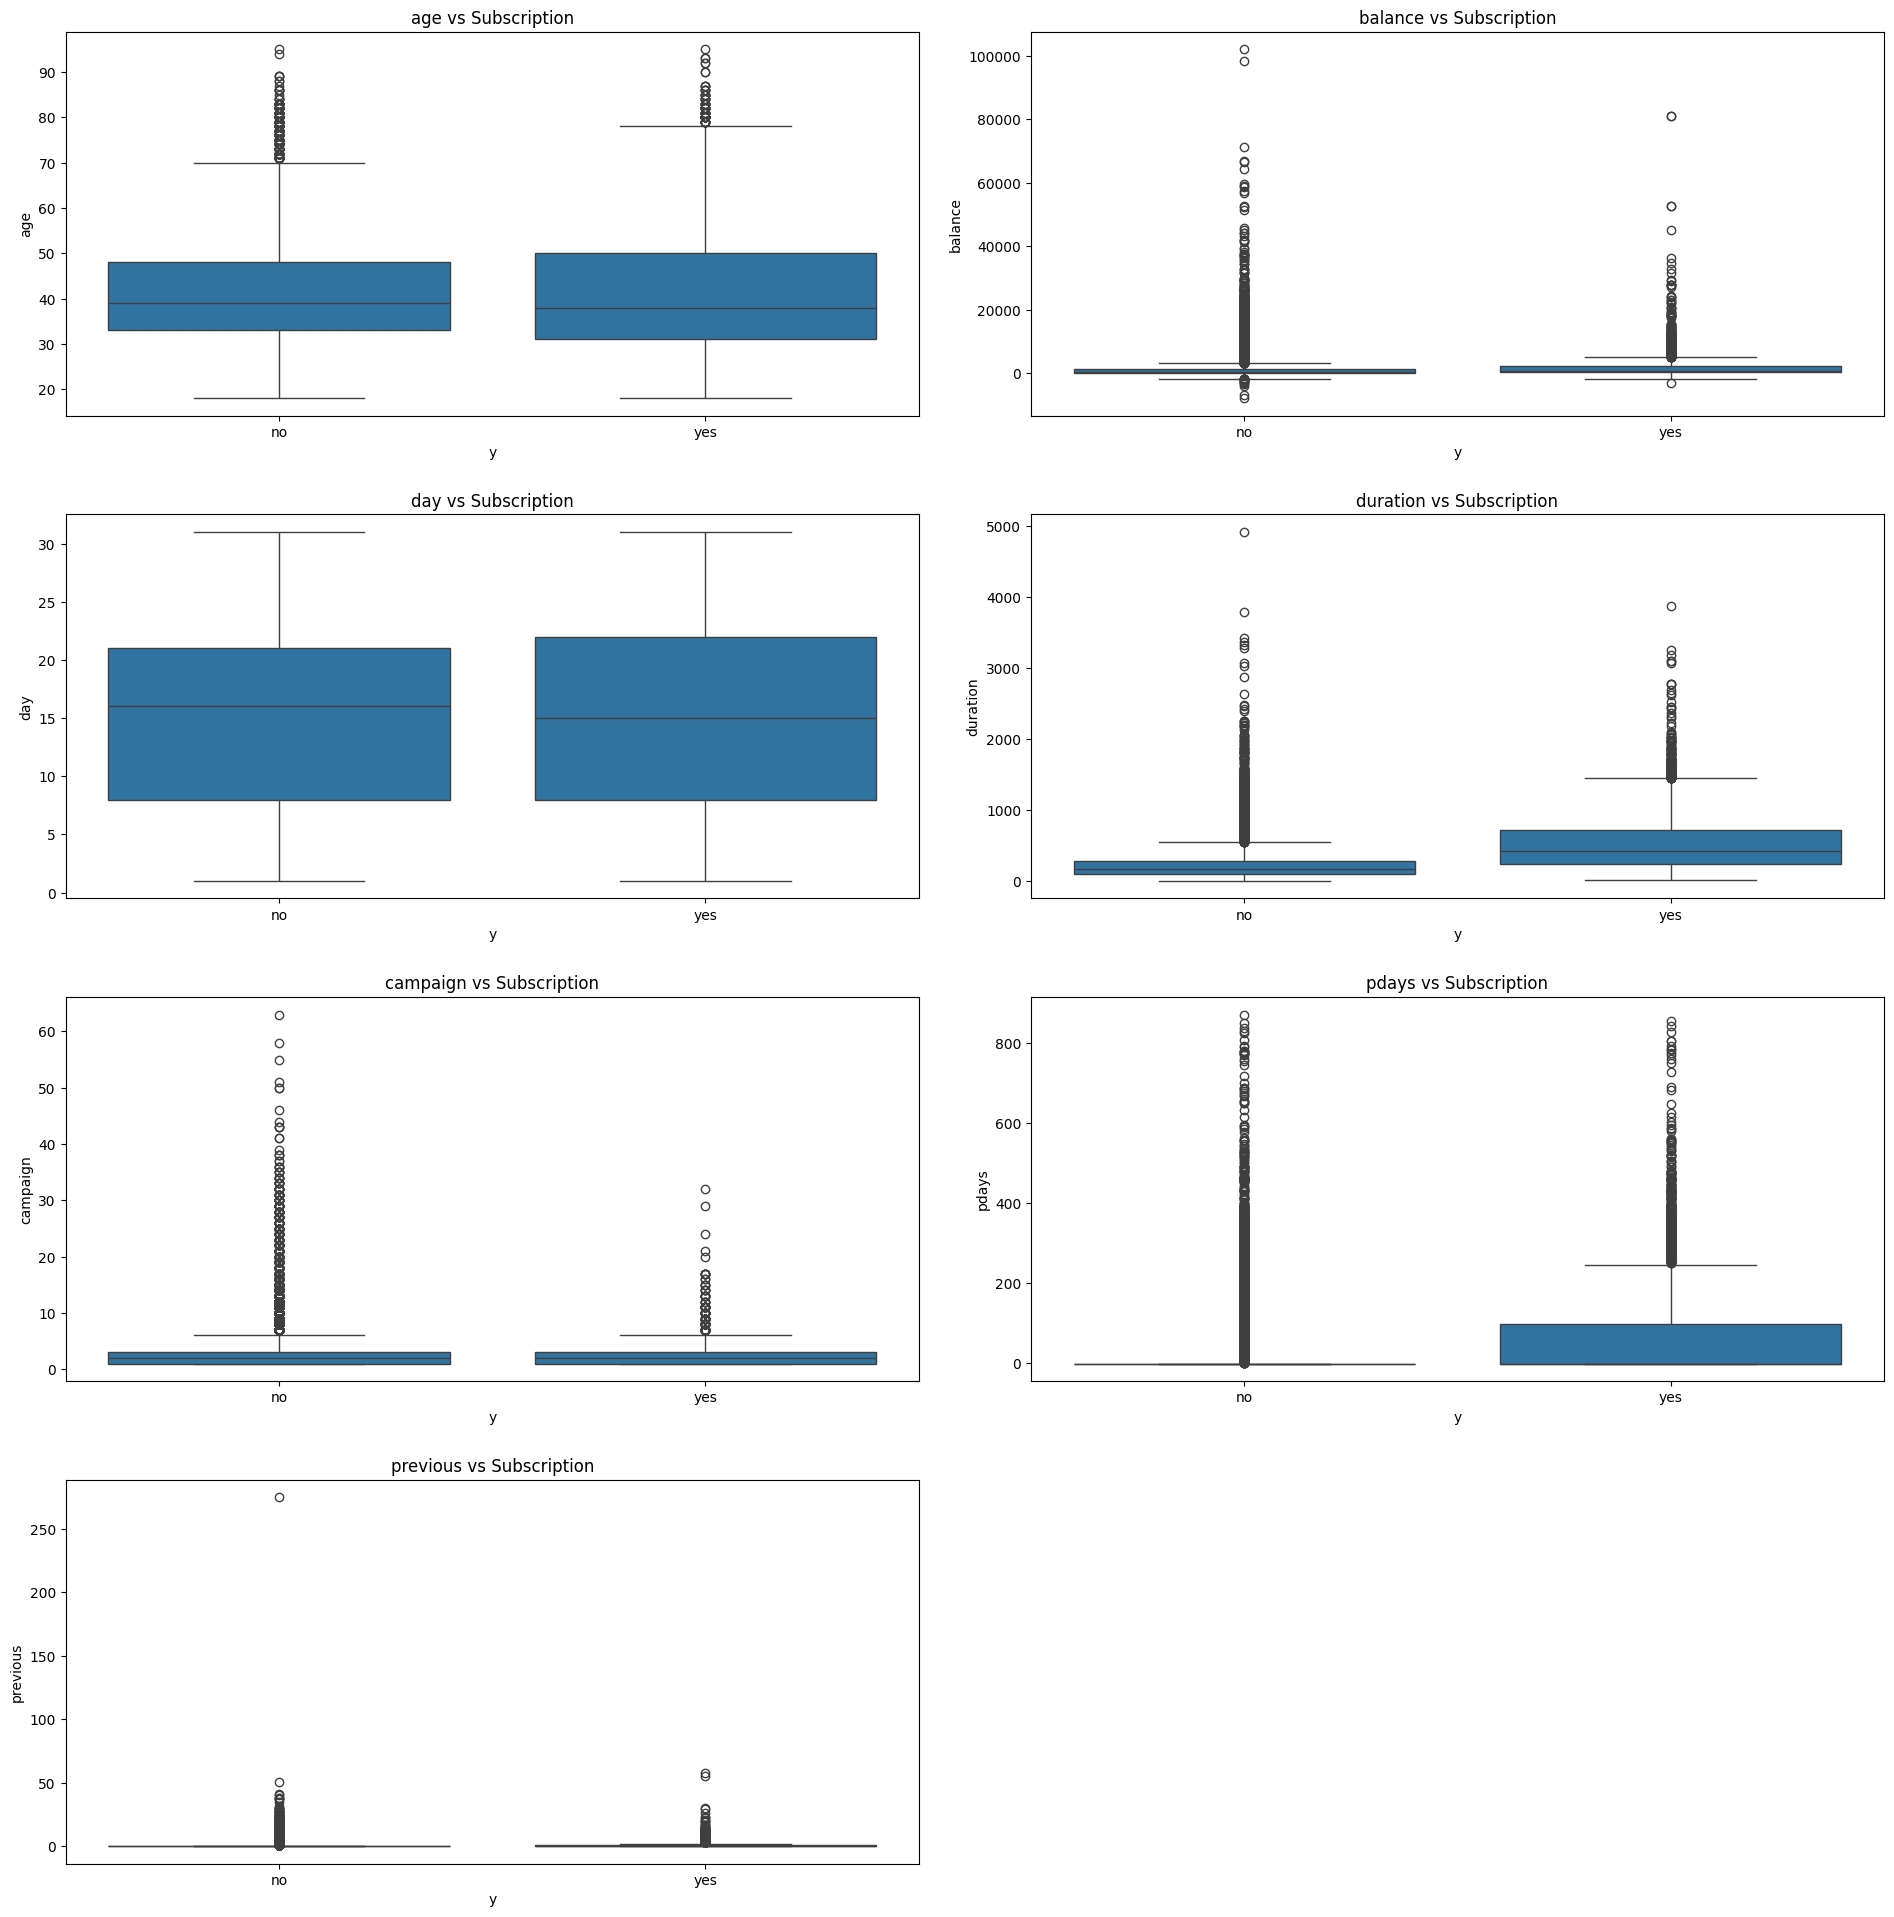

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define the size of the grid
n_cols = 2  # Number of columns in the grid
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Calculate the required number of rows

# Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.tight_layout(pad=5.0)  # Add space between plots

# Loop through the numerical features and create a boxplot for each
for i, feature in enumerate(numerical_features):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.boxplot(x='y', y=feature, data=df, ax=ax)
    ax.set_title(f'{feature} vs Subscription')

# If the number of features is odd, remove the last ax
if len(numerical_features) % n_cols != 0:
    fig.delaxes(axes[-1, -1])  # Remove the empty subplot if necessary

plt.show()

# **EDA on Categorical Features**

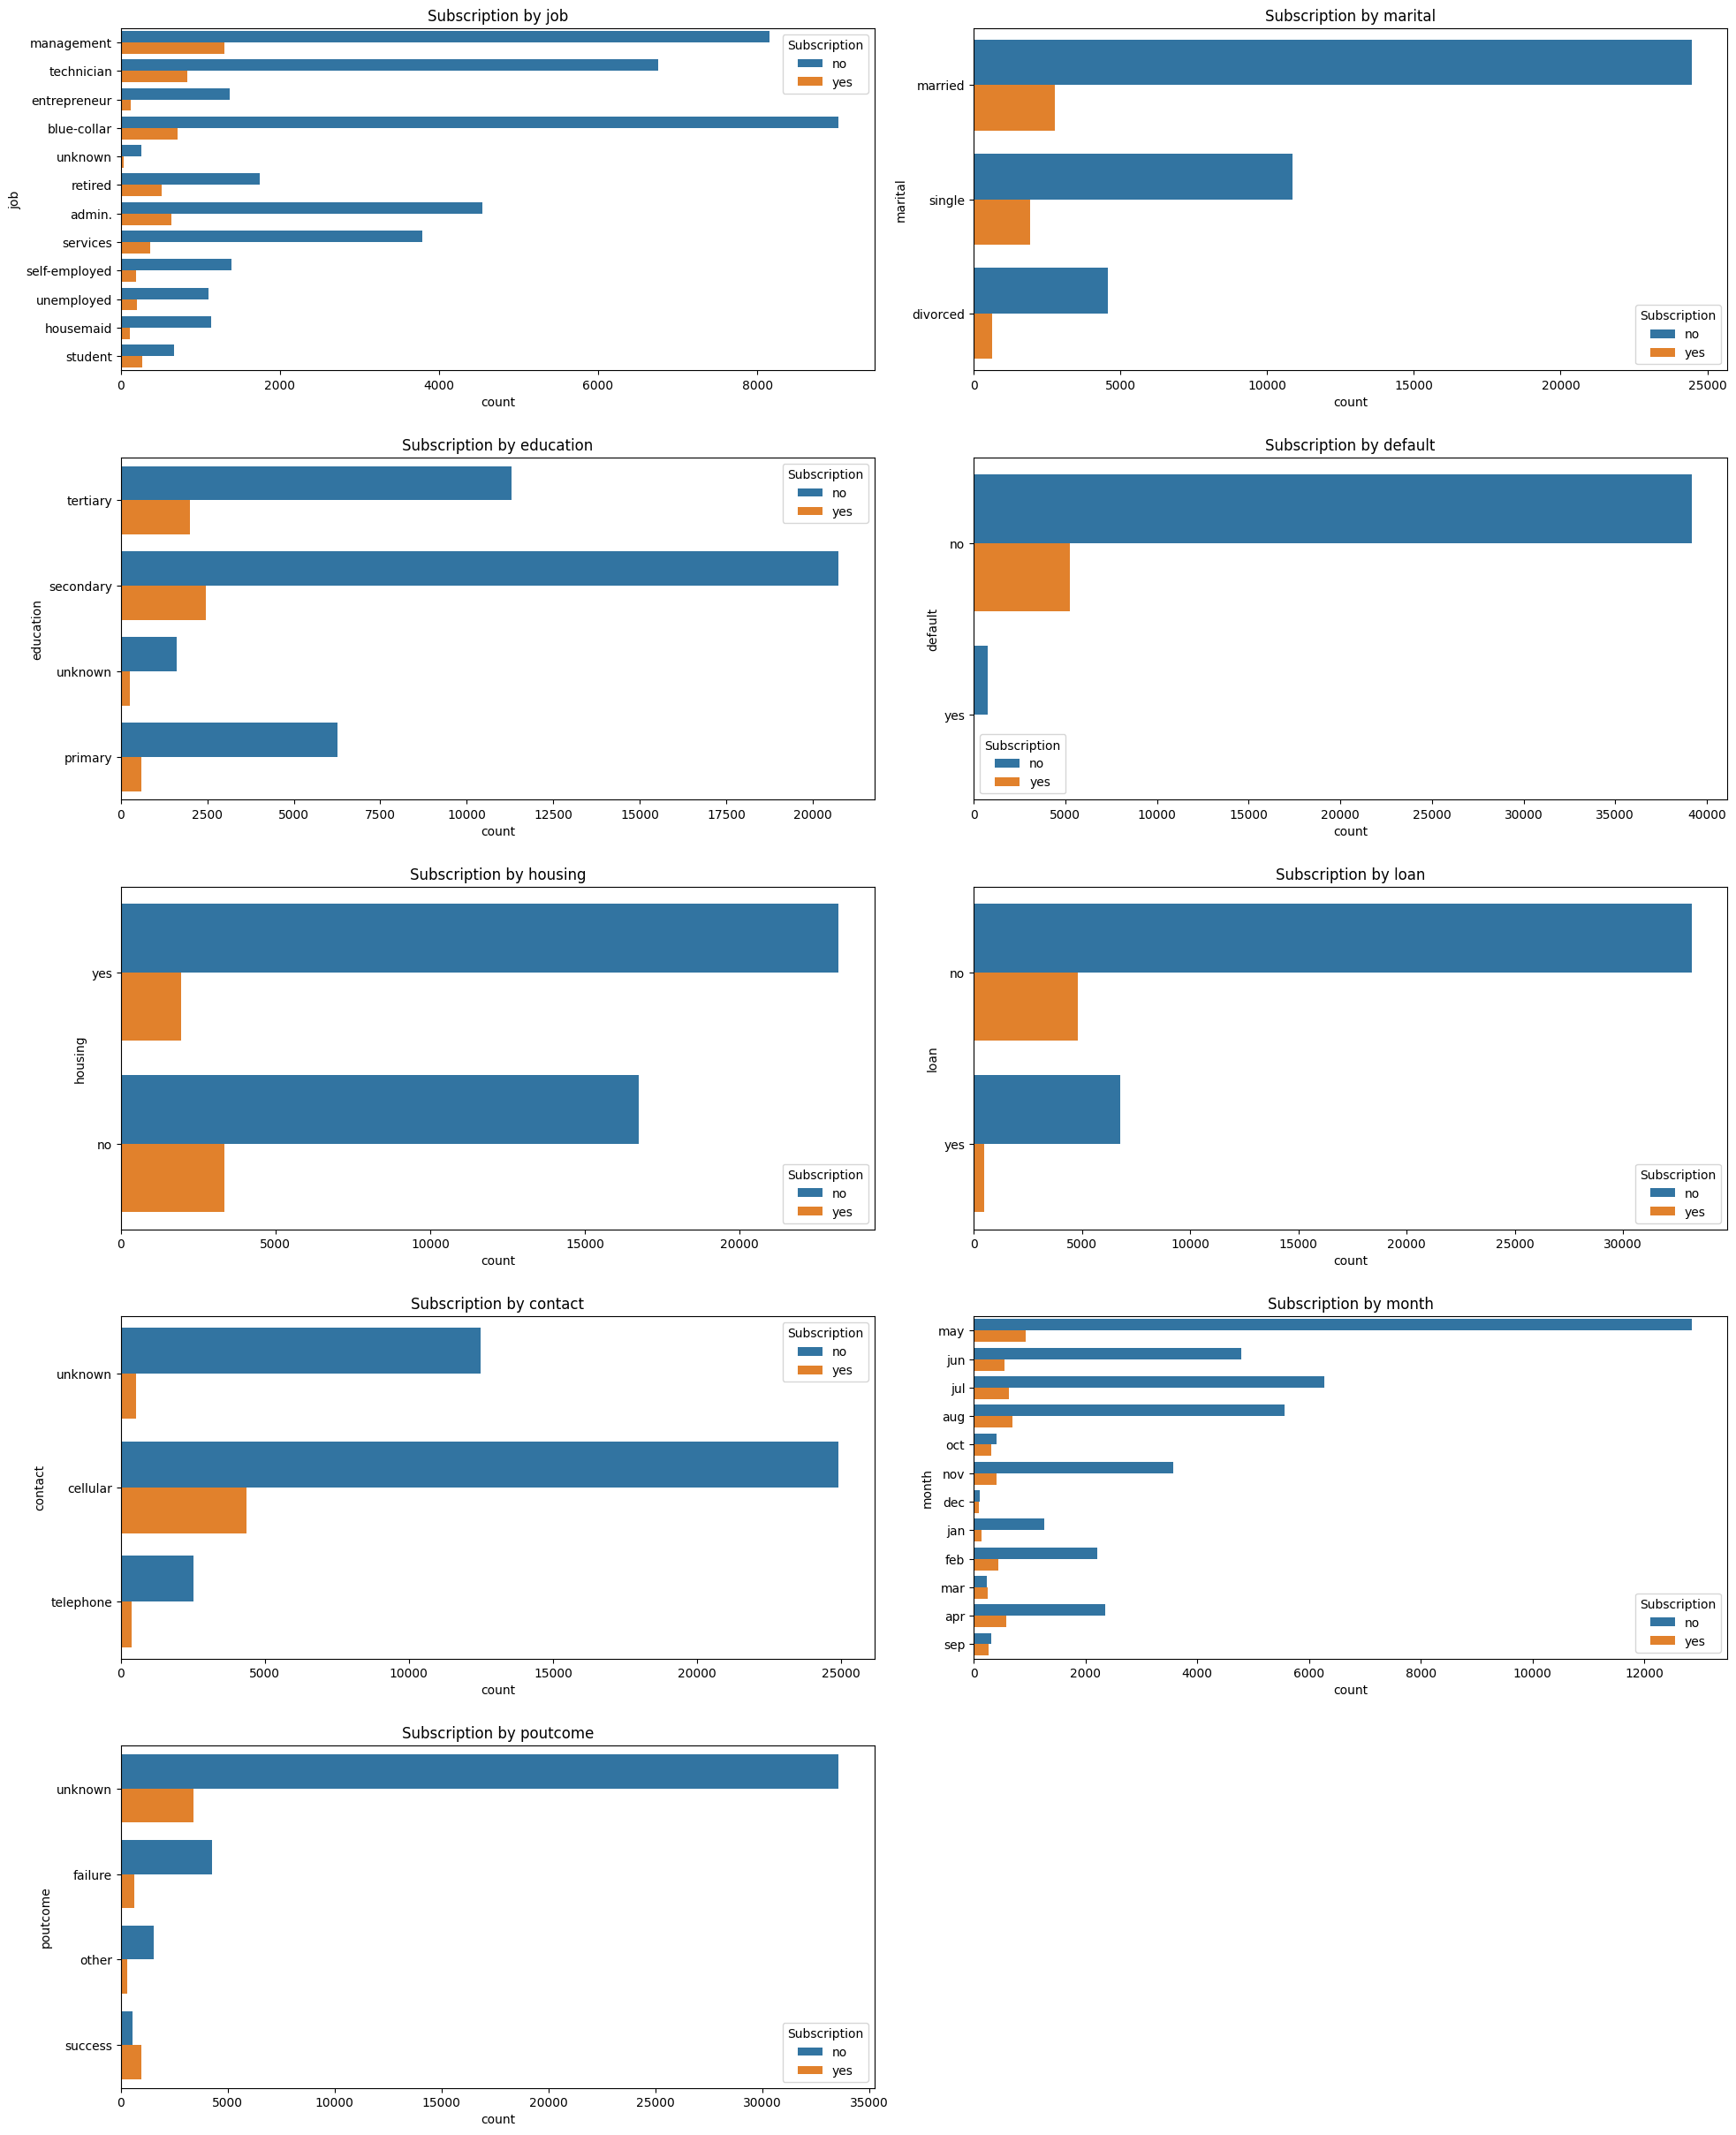

In [10]:
categorical_features = categorical_features.tolist()
categorical_features.remove('y')  # Remove the target variable if it's in the list

# Grid for subplots
n_cols = 2
n_rows = (len(categorical_features) + n_cols - 1) // n_cols  # Calculate the required number of rows

# Grid for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.tight_layout(pad=5.0)  # Add space between plots

# Loop through the categorical features and create a countplot for each
for i, feature in enumerate(categorical_features):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.countplot(y=feature, hue='y', data=df, ax=ax)
    ax.set_title(f'Subscription by {feature}')
    ax.legend(title='Subscription')

# If the number of features is odd, remove the last ax
if len(categorical_features) % n_cols != 0:
    fig.delaxes(axes[-1, -1])  # Remove the empty subplot if necessary

plt.show()

# **Converting ipynb to PDF and HTML**

In [13]:
!jupyter nbconvert --to pdf /content/Cruisebound.ipynb
!jupyter nbconvert --to html /content/Cruisebound.ipynb

[NbConvertApp] Converting notebook /content/Cruisebound.ipynb to pdf
[NbConvertApp] ERROR | Error while converting '/content/Cruisebound.ipynb'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 488, in export_single_notebook
    output, resources = self.exporter.from_filename(
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/exporters/exporter.py", line 189, in from_filename
    return self.from_file(f, resources=resources, **kw)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/exporters/exporter.py", line 206, in from_file
    return self.from_notebook_node(
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/exporters/pdf.py", line 181, in from_notebook_node
    latex, resources = super().from_notebook_node(nb, resources=resources, **kw)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/exporters/latex.py", line 74, in from_notebook_node
    return super().from_notebook_node(nb, resource